In [1]:
import pandas as pd
from plotnine import *
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [146]:
data = pd.read_csv('https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1')

data.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


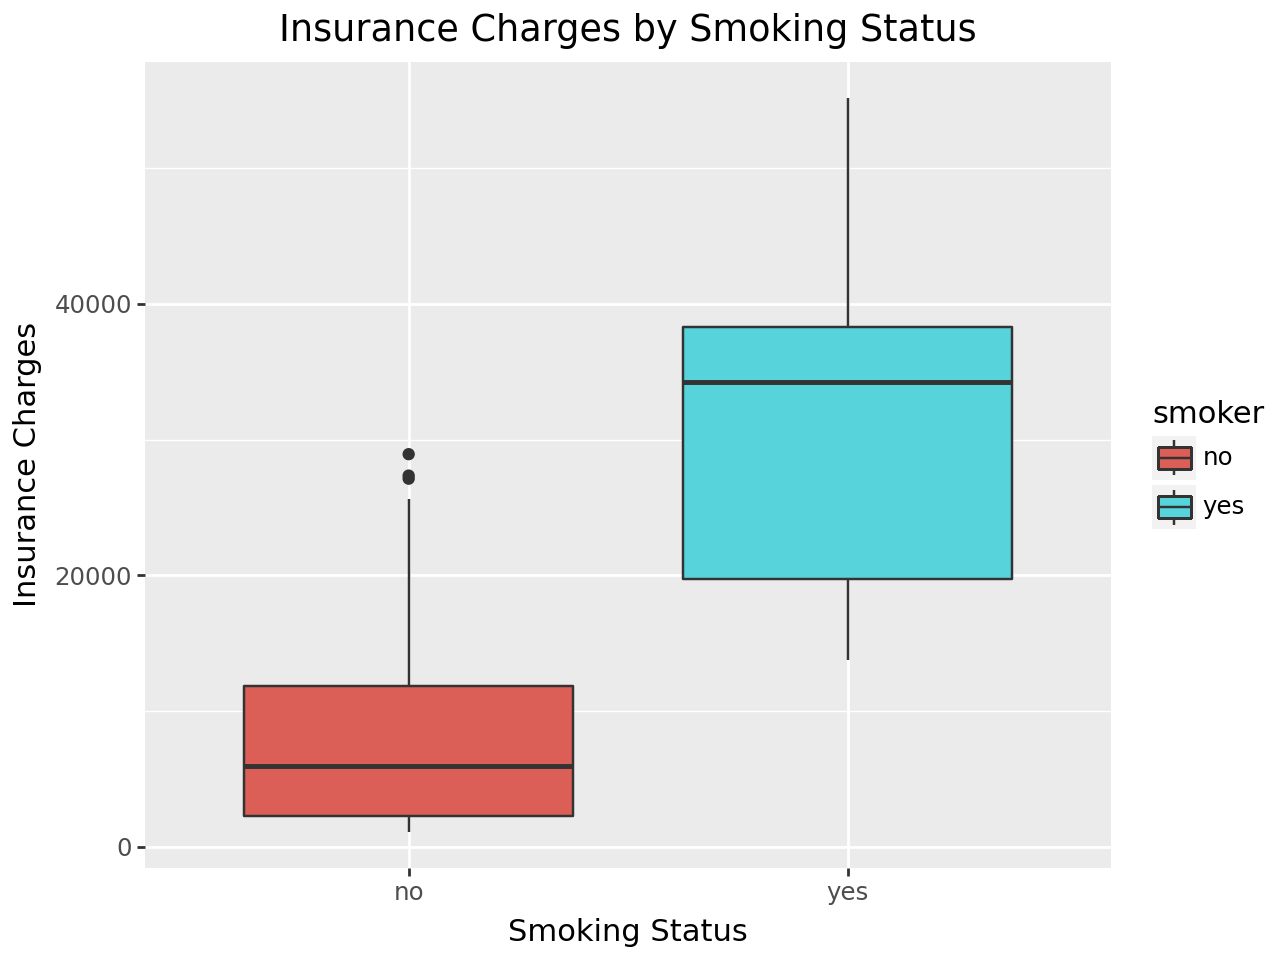

In [145]:
(ggplot(data, aes(x = 'smoker', y='charges', fill='smoker')) +
geom_boxplot()+
labs(x='Smoking Status', y='Insurance Charges', title='Insurance Charges by Smoking Status')
)


The graph above shows boxplots for the level of insurance charges for people that smoke vs people that don't smoke. As we can see, people that don't smoke have much lower insurance charges than people that do smoke on average. We can suggest that this indicates that people that smoke have more health issues or have to pay more in insurance charges because of their health quality.

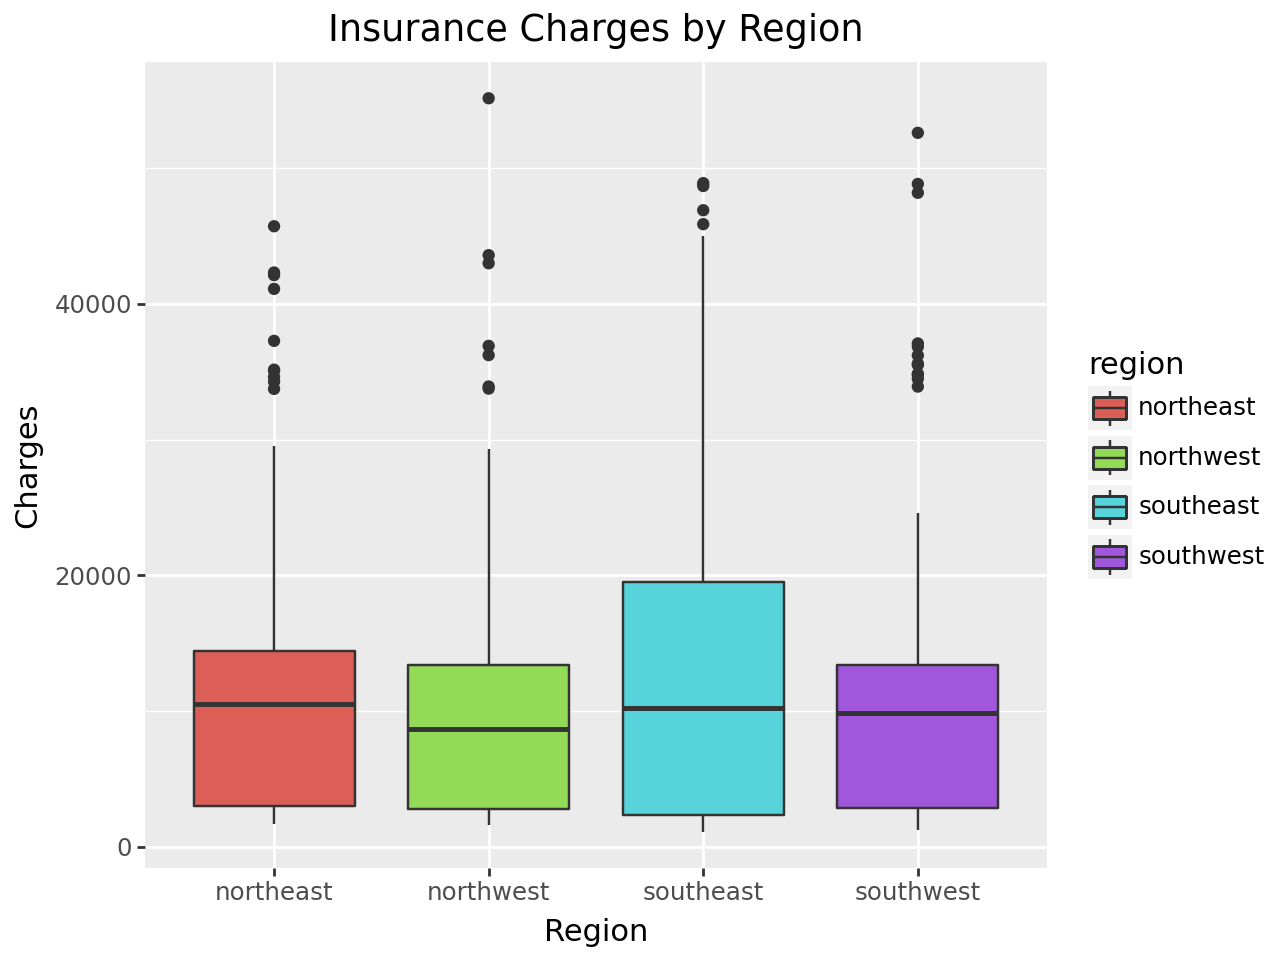

In [141]:
data_summary = data.groupby(['region', 'sex'], as_index=False)['charges'].mean()

(ggplot(data, aes(x='region', y='charges', fill='region'))+
geom_boxplot()+
labs(x='Region', y='Charges', title='Insurance Charges by Region')
)


The boxplot above shows the distribution of insurance charges for each of the four regions in the data set. We can see that region with highest average charges is the Northeast region. The Southeast region has the largest range as we can see by the width of the boxplot. The Northwest region has the lowest average insurance charges. There is not much that we can infer from this graph without having additional information, but it is possible that we could suggest that certain regions may have more expensive insurance or people that need more medical attention.

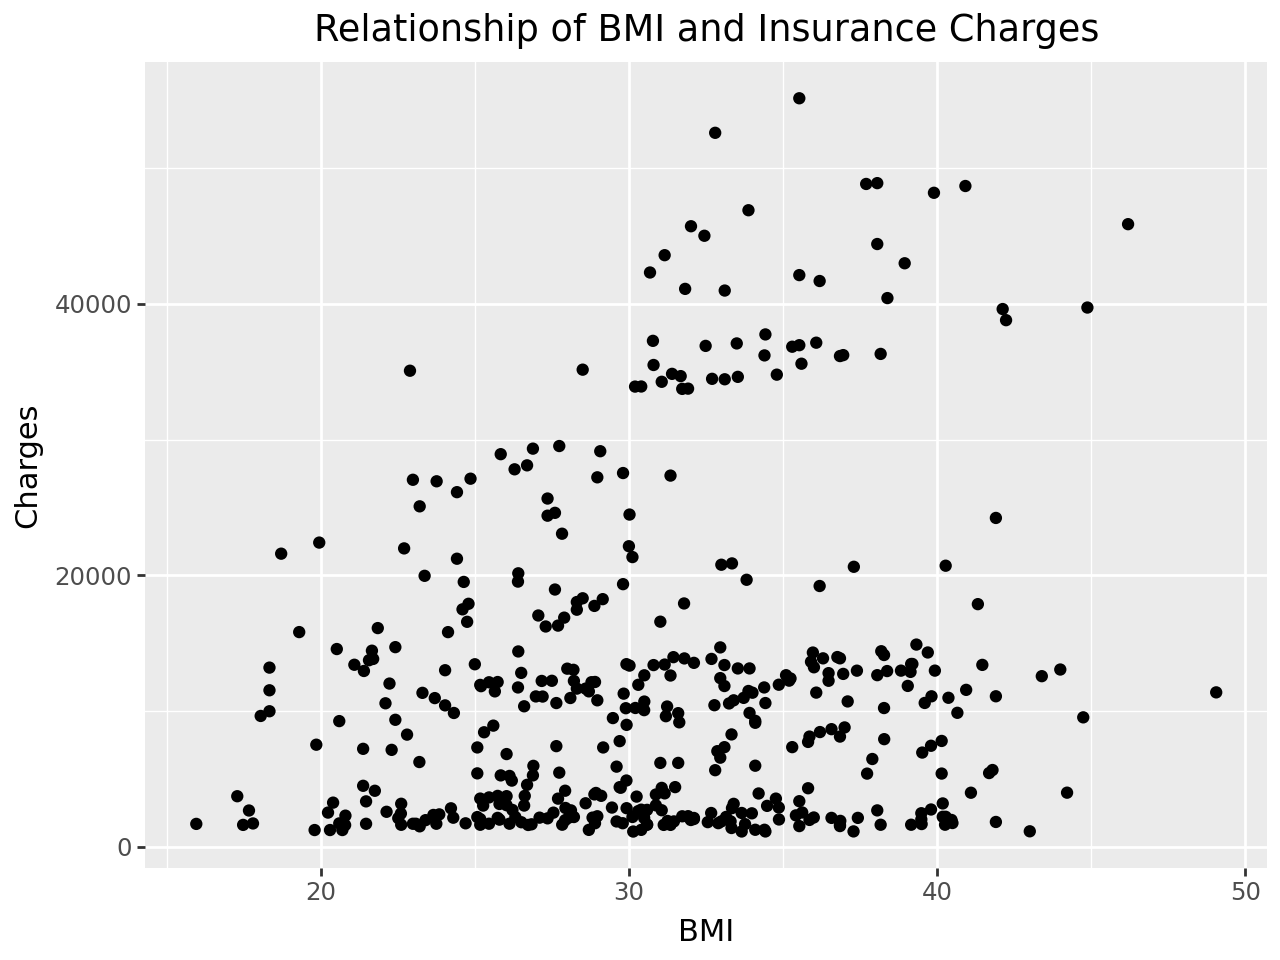

In [140]:
(ggplot(data, aes(x='bmi', y='charges'))+
geom_point()+
labs(x='BMI', y='Charges', title='Relationship of BMI and Insurance Charges')
)

We can see from the graph above that insurance charges tend to be higher for individuals with higher BMIs. This may indicate that people with higher BMIs have more health complications or are charged higher amounts for insurance.


# Part Two: Simple Linear Models

Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [5]:
X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.25, random_state=50)

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

mod1_y_pred_test = lr_model.predict(X_test)
mod1_mse = mean_squared_error(y_test, mod1_y_pred_test)
mod1_r2 = r2_score(y_test, mod1_y_pred_test)

print(lr_model.intercept_, lr_model.coef_)
print(mod1_mse.round(2))
print(mod1_r2.round(4))

4405.4191318757585 [214.00449073]
128051877.2
0.1119


The R^2 for this model is .1119. This mean that 11.19% of the variation in insurance charges is explained by the age variable. The MSE for this model is 128051877 which does not give us much information, but we can compare this value to other models to see which is better.

The coefficient on the age variable is 214.004. This mean that for every one year increase in age, the amount of predicted insurance charges increases by 214.004 dollars.

Make a model that also incorporates the variable sex. Report your results.

In [148]:
data_dummies = pd.get_dummies(data, drop_first=True)

In [6]:
X = data_dummies[['age', 'sex_male']]
y = data_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=50)

model2 = LinearRegression()

model2.fit(X_train, y_train)

mod2_y_pred_test = model2.predict(X_test)

mod2_mse = mean_squared_error(y_test, mod2_y_pred_test)
mod2_r2 = r2_score(y_test, mod2_y_pred_test)

print(mod2_mse)
print(mod2_r2)

128963874.91827796
0.10559165266000081


Now make a model that does not include sex, but does include smoker. Report your results.

In [7]:
X = data_dummies[['age', 'smoker_yes']]
y = data_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=50)

model3 = LinearRegression()

model3.fit(X_train, y_train)

mod3_y_pred_test = model3.predict(X_test)

mod3_mse = mean_squared_error(y_test, mod3_y_pred_test)
mod3_r2 = r2_score(y_test, mod3_y_pred_test)

print(model3.coef_, model3.intercept_)
print(mod3_mse)
print(mod3_r2)

[  241.4507253  23622.59536849] -1558.9089721654473
30425065.327423215
0.7889918210471256


Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [16]:
print("MSE for Model 2:", mod2_mse.round(2))
print('MSE for Model 3:', mod3_mse.round(2))

print('R^2 for Model 2:', mod2_r2.round(4))
print('R^2 for Model 3:', mod3_r2.round(4))

MSE for Model 2: 128963874.92
MSE for Model 3: 30425065.33
R^2 for Model 2: 0.1056
R^2 for Model 3: 0.789


As seen by the MSE and R^2 values above for Model 2 and Model 3, Model 3 is a better fit. The value of MSE is lower for model 3 which indicates that there is less error in the model than in Model 2. The R^2 value is 10.6% for Model 2 and 78.9% for Model 3. This means that much more of the variation in y is explained by Model 3 than by Model 2, so I would claim that the model with age and smoker (Model 3) better fits the data.


# Part Three: Multiple Linear Models

Now let’s consider including multiple quantitative predictors.


1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [8]:
X = data_dummies[['age', 'bmi']]
y = data_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=50)

model4 = LinearRegression()

model4.fit(X_train, y_train)

mod4_y_pred_test = model4.predict(X_test)

mod4_mse = mean_squared_error(y_test, mod4_y_pred_test)
mod4_r2 = r2_score(y_test, mod4_y_pred_test)

print('Intercept for the model:', model4.intercept_)
print('Coefficient for Age:', model4.coef_[0].round(2))
print('Coefficient for BMI:', model4.coef_[1].round(2))
print('MSE for Model 4:', mod4_mse.round(2))
print('R^2 for Model 4:', mod4_r2.round(4))

Intercept for the model: -4105.770791448895
Coefficient for Age: 203.47
Coefficient for BMI: 290.47
MSE for Model 4: 125653921.91
R^2 for Model 4: 0.1285


The MSE is lower for the model with both age and bmi than for the model with just age as a predictor. The R^2 for the model with age and bmi also has a higher R^2, which is .1285 as compared to the other model with has .1119. This indicates that this model may be a better fit for the data than the first model.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [9]:
X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=40)

poly_2 = PolynomialFeatures(degree=2)
X_train_poly = poly_2.fit_transform(X_train)
X_test_poly = poly_2.transform(X_test)

model5 = LinearRegression()
model5.fit(X_train_poly, y_train)

mod5_y_pred_test = model5.predict(X_test_poly)

mod5_mse = mean_squared_error(y_test, mod5_y_pred_test)
mod5_r2 = r2_score(y_test, mod5_y_pred_test)


print("MSE for Question 2.1 Model:", mod1_mse.round(2))
print('MSE for Polynomial Model:', mod5_mse.round(2))

print('R^2 for Question 2.1 Model:', mod1_r2.round(4))
print('R^2 for Polynomial Model:', mod5_r2.round(4))
print(' ')
print('Intercept for the model:', model5.intercept_)
print('Coefficient for Age:', model5.coef_[1].round(2))
print('Coefficient for Age^2:', model5.coef_[2].round(3))

MSE for Question 2.1 Model: 128051877.2
MSE for Polynomial Model: 142129588.56
R^2 for Question 2.1 Model: 0.1119
R^2 for Polynomial Model: 0.1147
 
Intercept for the model: 4547.279250511635
Coefficient for Age: 182.85
Coefficient for Age^2: 0.401


The MSE is higher for the model that includes Age^2 than for the model that only includes Age. At the same time, the R^2 is slightly higher for the polynomial model than for the linear model. In this case R^2 isn't the best metric to use because the polynomial model will explain for variation in the target variable since it has more predictor variables than the linear model.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [15]:
X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=40)

poly_4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly_4.fit_transform(X_train)
X_test_poly4 = poly_4.transform(X_test)

model6 = LinearRegression()
model6.fit(X_train_poly4, y_train)

mod6_y_pred_test = model6.predict(X_test_poly4)

mod6_mse = mean_squared_error(y_test, mod6_y_pred_test)
mod6_r2 = r2_score(y_test, mod6_y_pred_test)


print("MSE for Question 2.1 Model:", mod1_mse.round(2))
print('MSE for Polynomial Model:', mod6_mse.round(2))
print('R^2 for Question 2.1 Model:', mod1_r2.round(4))
print('R^2 for Polynomial Model:', mod6_r2.round(4))
print(' ')
print('Intercept for the model:', model6.intercept_.round(2))
print('Coefficient for Age:', model6.coef_[1].round(2))
print('Coefficient for Age^2:', model6.coef_[2].round(3))
print('Coefficient for Age^3:', model6.coef_[3].round(3))
print('Coefficient for Age^4:', model6.coef_[4].round(3))

MSE for Question 2.1 Model: 128051877.2
MSE for Polynomial Model: 140993651.75
R^2 for Question 2.1 Model: 0.1119
R^2 for Polynomial Model: 0.1217
 
Intercept for the model: 67634.21
Coefficient for Age: -7747.65
Coefficient for Age^2: 348.344
Coefficient for Age^3: -6.323
Coefficient for Age^4: 0.041


The MSE for the polynomial model is greater than the MSE for the linear model. However, the R^2 metric is larger for the polynomial model that it is for the linear model. Since the polynomial model has more predictors, I would argue that the linear model is a better fit for the data due to the MSE being lower for the model.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [40]:
X = data[['age']]
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=40)

poly_12 = PolynomialFeatures(degree=12)
X_train_poly12 = poly_12.fit_transform(X_train)
X_test_poly12 = poly_12.transform(X_test)
X_model = poly_12.fit_transform(X)


model7 = LinearRegression()
model7.fit(X_train_poly12, y_train)

mod7_y_pred_test = model7.predict(X_test_poly12)

mod7_mse = mean_squared_error(y_test, mod7_y_pred_test)
mod7_r2 = r2_score(y_test, mod7_y_pred_test)

mod7_coefs = model7.coef_


print('Intercept for the model:', model7.intercept_.round(2))
print('Coefficient for Age:', mod7_coefs[1])
for i, coefficient in enumerate(mod7_coefs[2:]):
    poly = i + 1
    print(f'Coefficient for Age^{poly}: {coefficient}')

print('')
print("MSE for Question 2.1 Model:", mod1_mse.round(2))
print('MSE for Polynomial Model:', mod7_mse.round(2))
print('R^2 for Question 2.1 Model:', mod1_r2.round(4))
print('R^2 for Polynomial Model:', mod7_r2.round(4))


Intercept for the model: 11199.88
Coefficient for Age: -4.2258575196468134e-05
Coefficient for Age^1: -1.748191310506085e-08
Coefficient for Age^2: -1.2529583404957542e-06
Coefficient for Age^3: -2.0771899000500455e-05
Coefficient for Age^4: -0.00024820779808592695
Coefficient for Age^5: -0.0016591065072079673
Coefficient for Age^6: 0.00021299484794787884
Coefficient for Age^7: -1.1112921846669213e-05
Coefficient for Age^8: 3.0404193060746733e-07
Coefficient for Age^9: -4.613309964661323e-09
Coefficient for Age^10: 3.686881580769852e-11
Coefficient for Age^11: -1.2139012360213418e-13

MSE for Question 2.1 Model: 128051877.2
MSE for Polynomial Model: 145833307.97
R^2 for Question 2.1 Model: 0.1119
R^2 for Polynomial Model: 0.0916


The MSE for the polynomial poly is larger than the MSE for the linear model. The R^2 is is also lower with a value of .0916 compared a value of .1119 for the linear model. This indicates that the linear model is a better fit for the data than the degree 12 polynomial model.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

According to R^2 and MSE, the model that best fits the data is the linear model that includes age and bmi as predictor variables. This is because it has the lowest MSE and the highest R^2 out of all the models that were fitted. I would argue that this is not truely the best model because we only attempted to fit a select few combiniations of variables. We also didn't attempt to use things like interaction terms or polynomial terms on variables other than age.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

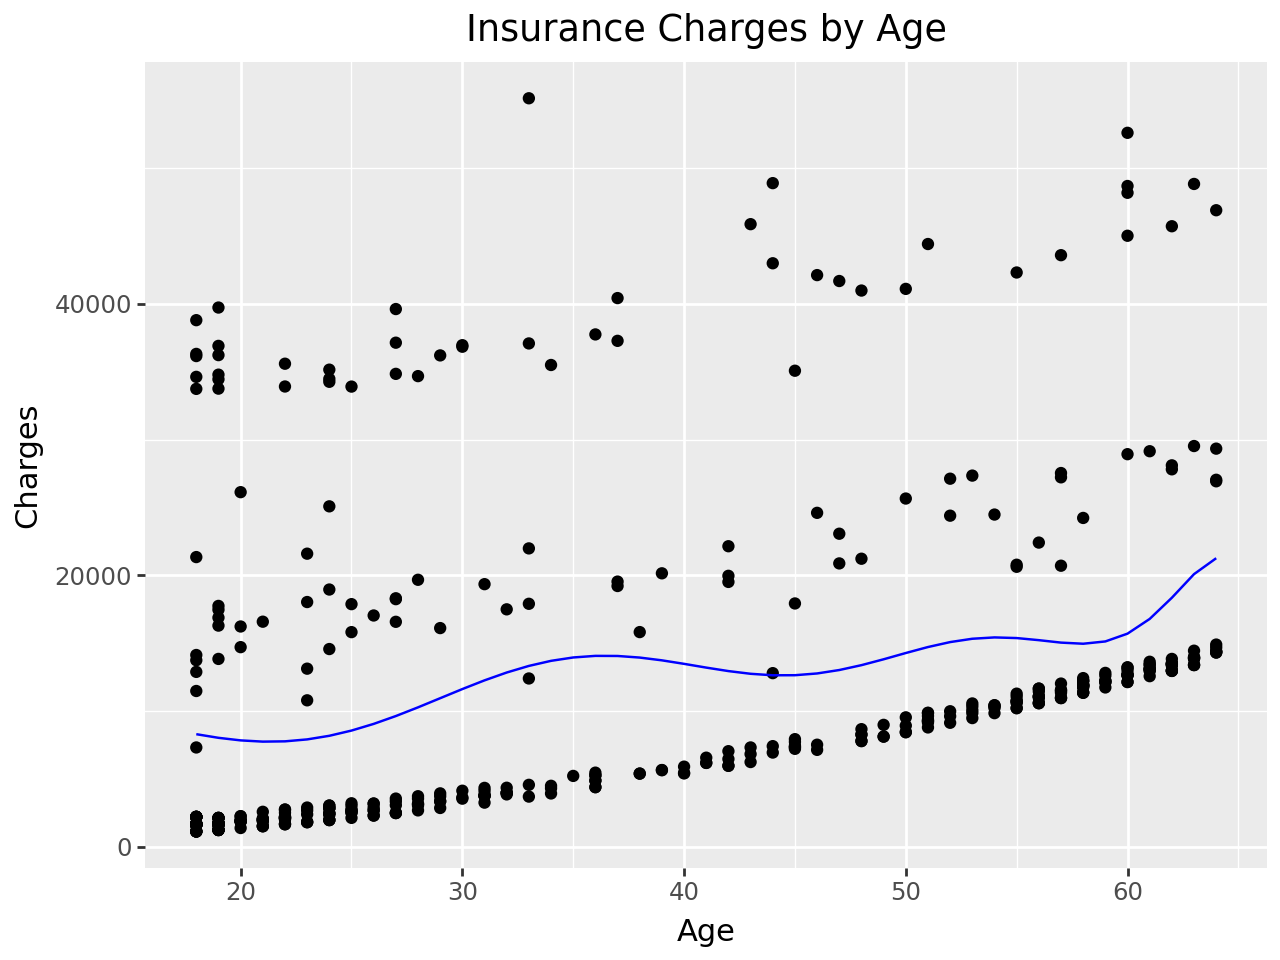

In [55]:
new_data = pd.DataFrame({
    'age': X['age'],
    'charges': y,
    'pred': model7.predict(X_model)
})

(ggplot(new_data, aes(x='age', y='charges'))+
geom_point() +
geom_line(aes(y = "pred"), color = "blue")+
labs(x = 'Age', y = 'Charges', title = "Insurance Charges by Age")
)

# Part Four: New data

Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

In [149]:
data2 = pd.read_csv('https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1')

In [62]:
X = data2[['age']]
y = data2['charges']

new_pred_y_mod1 = lr_model.predict(X)

new_mod1_mse = mean_squared_error(y,new_pred_y_mod1)

print('Model 1 MSE:', new_mod1_mse.round(2))

Model 1 MSE: 136546379.41


In [65]:
X = data2[['age', 'bmi']]
y = data2['charges']

new_pred_y_mod2 = model4.predict(X)

new_mod2_mse = mean_squared_error(y,new_pred_y_mod2)

print('Model 2 MSE:', new_mod2_mse.round(2))

Model 2 MSE: 132997296.87


In [72]:
data2_dummies = pd.get_dummies(data2)

X = data_dummies[['age', 'bmi', 'smoker_yes']]
y = data_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=40)

mod3 = LinearRegression()
mod3.fit(X_train, y_train)

X = data2_dummies[['age', 'bmi', 'smoker_yes']]
y = data2_dummies['charges']

new_pred_y_mod3 = mod3.predict(X)

new_mod3_mse = mean_squared_error(y, new_pred_y_mod3)

print('Model 3 MSE:', new_mod3_mse.round(2))

Model 3 MSE: 35438105.41


In [83]:
X = data_dummies[['age','bmi','smoker_yes']].copy()
y = data_dummies['charges']

X.loc[:,'age_smoker'] = X['age'] * X['smoker_yes']
X.loc[:,'bmi_smoker'] = X['bmi'] * X['smoker_yes']

X = X.drop(columns=['smoker_yes'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 40)
mod4 = LinearRegression()

mod4.fit(X_train, y_train)

X = data2_dummies[['age', 'bmi', 'smoker_yes']].copy()
y = data2_dummies['charges']

X.loc[:,'age_smoker'] = X['age'] * X['smoker_yes']
X.loc[:,'bmi_smoker'] = X['bmi'] * X['smoker_yes']

X = X.drop(columns= ['smoker_yes'])

new_pred_y_mod4 = mod4.predict(X)

new_mod4_mse = mean_squared_error(y, new_pred_y_mod4)

print('Model 4 MSE:', new_mod4_mse.round(2))

Model 4 MSE: 24694829.3


In [92]:
X = data_dummies[['age','bmi','smoker_yes']].copy()
y = data_dummies['charges']

X.loc[:,'age_smoker'] = X['age'] * X['smoker_yes']
X.loc[:,'bmi_smoker'] = X['bmi'] * X['smoker_yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25, random_state= 40)

mod5 = LinearRegression()

mod5.fit(X_train, y_train)

X = data2_dummies[['age','bmi','smoker_yes']].copy()
y = data2_dummies['charges']

X.loc[:,'age_smoker'] = X['age'] * X['smoker_yes']
X.loc[:,'bmi_smoker'] = X['bmi'] * X['smoker_yes']

new_pred_y_mod5 = mod5.predict(X)

new_mod5_mse = mean_squared_error(y, new_pred_y_mod5)

print('Model 5 MSE:', new_mod5_mse.round(2))

Model 5 MSE: 21474796.31


Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Based on the MSE of each of the five models, we can see that Model 5 is the best fit. This is because the MSE is the lowest for Model 5 than for any of the other models.

Make a plot showing the residuals of your final chosen model.

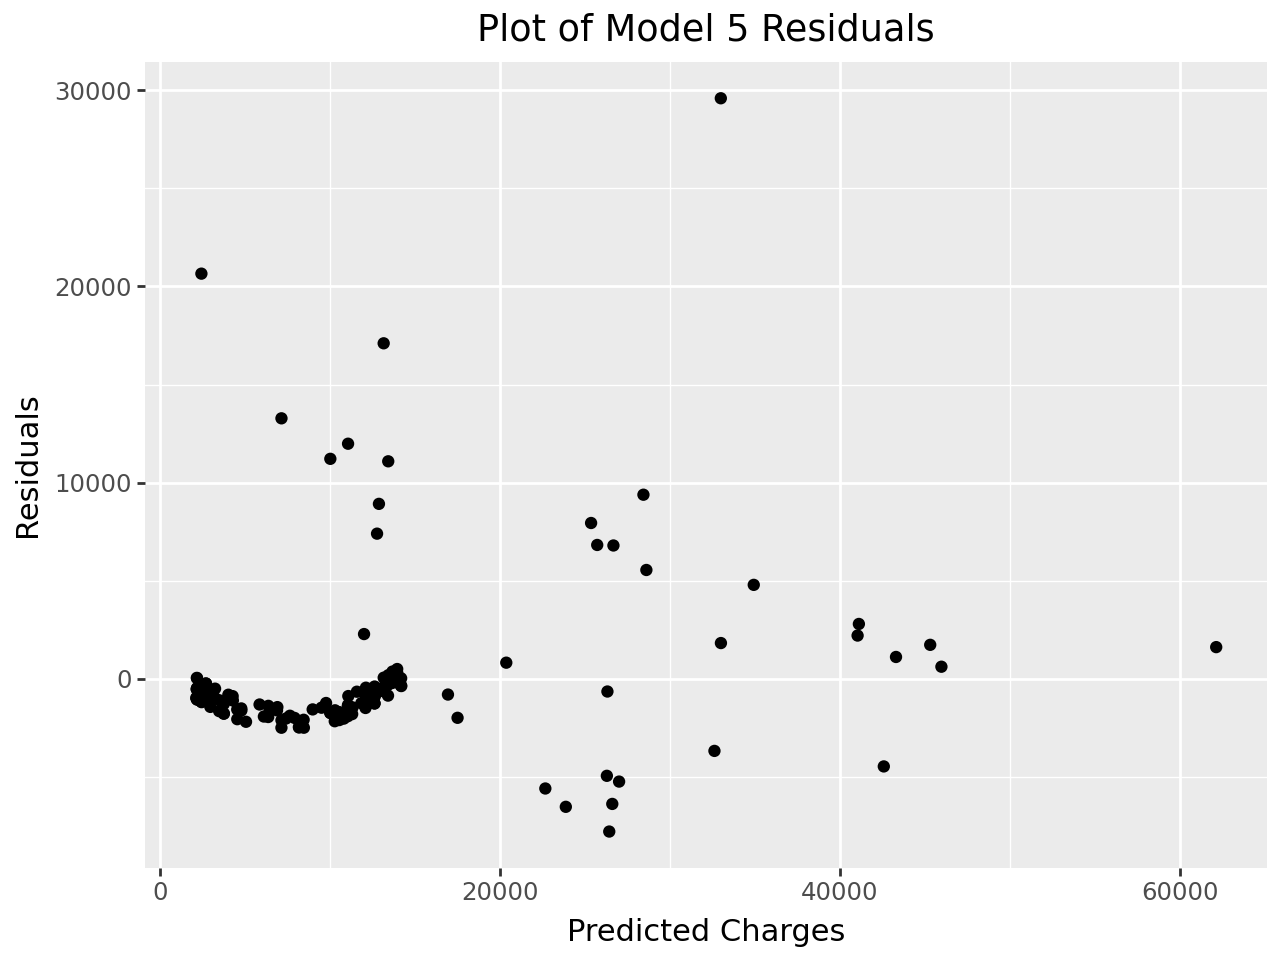

In [104]:
mod5.fit(X_train, y_train)

y_pred = mod5.predict(X)
residuals = data2_dummies['charges'] - y_pred
plot_df = pd.DataFrame({
    'Residuals': residuals,
    'y_pred': y_pred
})


(ggplot(plot_df, aes(x="y_pred", y="residuals"))+
geom_point()+
labs(x='Predicted Charges', y='Residuals', title='Plot of Model 5 Residuals')
)



# Part Five: Full Exploration

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [139]:
X = data[['age', 'bmi', 'smoker', 'region', 'sex']]
y = data['charges']

X_new = data2[['age', 'bmi', 'smoker', 'region', 'sex']]
y_new = data2['charges']

ct_preprocess = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), ['age', 'bmi']),
        ('categorical', OneHotEncoder(drop='first'), ['smoker', 'region', 'sex'])
    ]
)

best_degree = 0
best_model = None
mse_lowest = float('inf')

for degree in range(1, 10):
    pipeline = Pipeline(steps=[
        ('preprocess', ct_preprocess),
        ('poly', PolynomialFeatures(degree=degree, include_bias=False, interaction_only=False)),
        ('regressor', LinearRegression())
    ])
        
    pipeline.fit(X, y)

    y_pred = pipeline.predict(X_new)
    mse = mean_squared_error(y_new, y_pred)
    
    if mse < mse_lowest:
        mse_lowest = mse
        best_degree = degree
        best_model = pipeline

best_degree, mse_lowest.round(2)
print('Best Model Polynomial:', best_degree)
print('Best Model MSE:', mse_lowest.round(2))
y_pred_best = best_model.predict(X_new)
residuals = y_new - y_pred_best

Best Model Polynomial: 2
Best Model MSE: 24565034.6


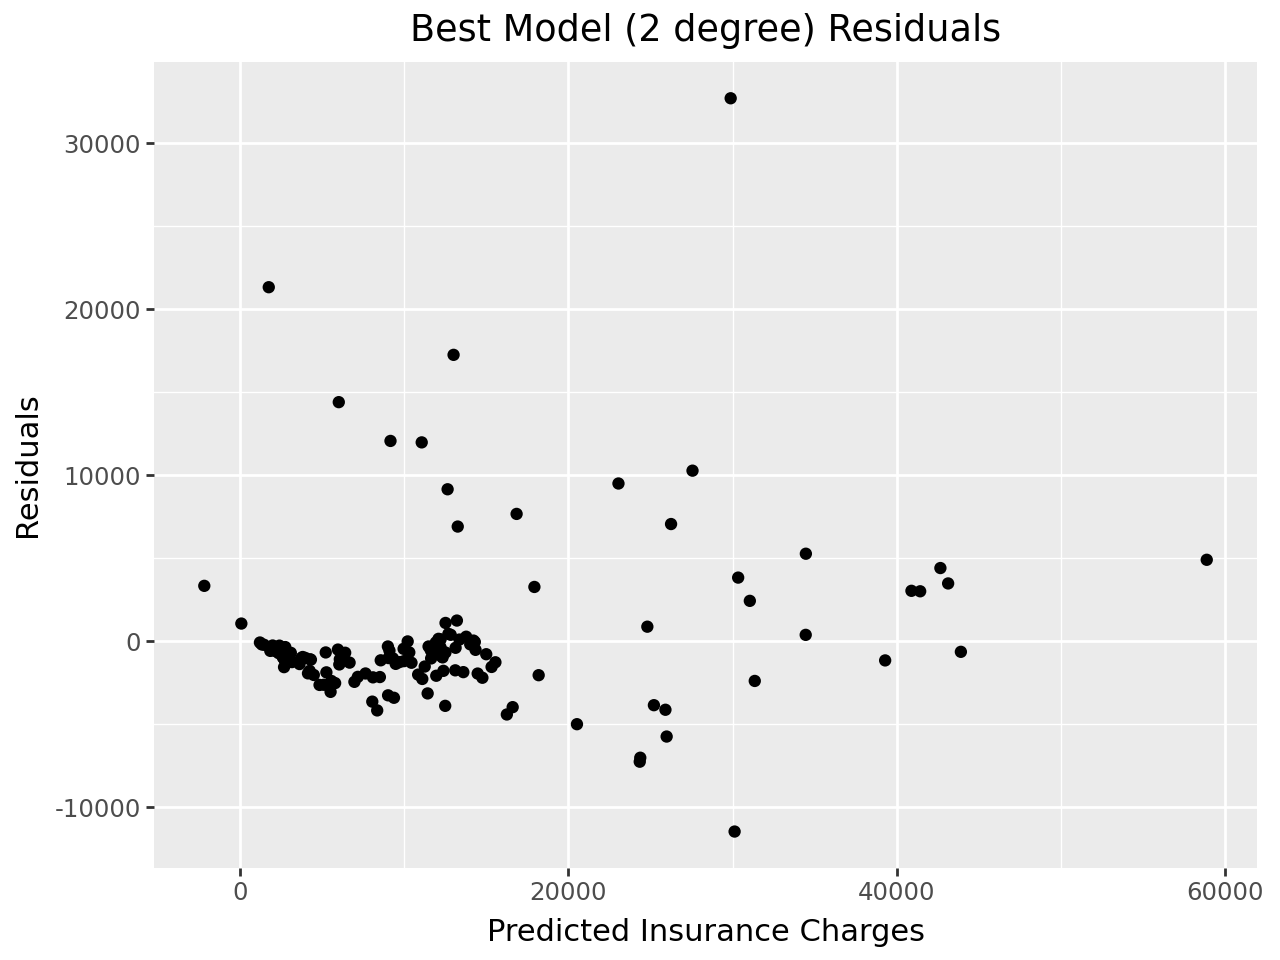

In [136]:
data_plot = pd.DataFrame({
    'residuals': residuals,
    'y_preds': y_pred_best
    
})

(ggplot(data_plot, aes(x='y_preds', y='residuals'))+
geom_point()+
labs(x='Predicted Insurance Charges', y='Residuals', title='Best Model (2 degree) Residuals')
)

# Appendix

No outside sources we used to create the code for this assignment. Chat GPT was consulted to fix issues with bugs and trouble shooting. Many of these things boiled down to simple syntax errors or using function incorrectly and was only used to assist with fixing already written code. Other than this, the only other resource that was used was the course textbook.